# NEO

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
import sys

# Append the directory, not the file
sys.path.append('/Volumes/Maestria/GitHub/NEO/NEO/API_test/')

import dataprocess as dp


## Loading

In [2]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/neo_data_copy.csv') 
df.head()

,links,id,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,orbital_data,is_sentry_object
0,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2000433.0,2000433.0,433 Eros (A898 PA),Eros,433,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,10.41,{'kilometers': {'estimated_diameter_min': 22.0...,False,"[{'close_approach_date': '1900-12-27', 'close_...","{'orbit_id': '659', 'orbit_determination_date'...",False
1,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2000719.0,2000719.0,719 Albert (A911 TB),Albert,719,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,15.59,{'kilometers': {'estimated_diameter_min': 2.02...,False,"[{'close_approach_date': '1909-08-21', 'close_...","{'orbit_id': '266', 'orbit_determination_date'...",False
2,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2000887.0,2000887.0,887 Alinda (A918 AA),Alinda,887,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,13.88,{'kilometers': {'estimated_diameter_min': 4.45...,False,"[{'close_approach_date': '1910-01-04', 'close_...","{'orbit_id': '488', 'orbit_determination_date'...",False
3,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2001036.0,2001036.0,1036 Ganymed (A924 UB),Ganymed,1036,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,9.25,{'kilometers': {'estimated_diameter_min': 37.5...,False,"[{'close_approach_date': '1910-02-25', 'close_...","{'orbit_id': '1240', 'orbit_determination_date...",False
4,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2001221.0,2001221.0,1221 Amor (1932 EA1),Amor,1221,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.38,{'kilometers': {'estimated_diameter_min': 0.88...,False,"[{'close_approach_date': '1900-03-08', 'close_...","{'orbit_id': '121', 'orbit_determination_date'...",False


In [3]:
df = dp.OverallProcessor(df).clean()
df.head()

,absolute_magnitude_h,is_hazardous,relative_velocity.kilometers_per_hour,miss_distance.kilometers,estimated_diameter_min,estimated_diameter_max,minimum_orbit_intersection,eccentricity,inclination,perihilion_distance,aphelion_distance,estimated_diameter_average
0,10.41,0,20083.0290749201,47112732.928149391,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
1,10.41,0,15820.1671985367,70533232.893794475,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
2,10.41,0,17340.4224662258,74687814.59975122,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
3,10.41,0,16545.797587763,53823292.394218643,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
4,10.41,0,21314.9467227704,26040971.835879446,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593


In [4]:
df1 = df.copy()
df1 = dp.OverallProcessor(df1).adasyn()
df1.shape

(272280, 12)

In [5]:
df2 = df.copy()
df2 = dp.OverallProcessor(df2).rus()
df2.head()
print(df2.shape)

(25096, 12)


<Axes: >

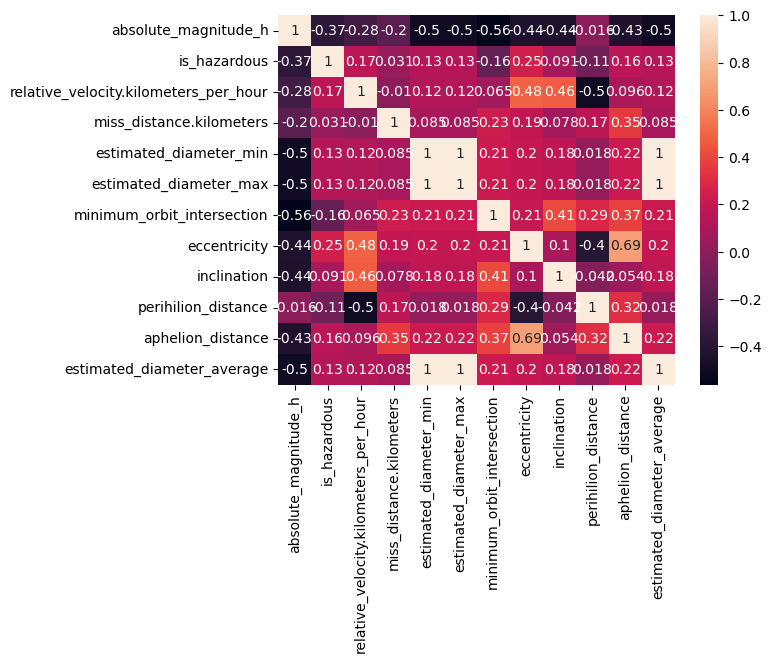

In [6]:
sns.heatmap(df.corr(), annot=True)

In [7]:
corr_matrix = df2.corr()

corr_matrix['is_hazardous'].sort_values(ascending=False)

is_hazardous                             1.000000
eccentricity                             0.420324
relative_velocity.kilometers_per_hour    0.279241
aphelion_distance                        0.271060
estimated_diameter_min                   0.263099
estimated_diameter_average               0.263099
estimated_diameter_max                   0.263099
inclination                              0.145264
miss_distance.kilometers                 0.052587
perihilion_distance                     -0.202283
minimum_orbit_intersection              -0.352556
absolute_magnitude_h                    -0.648174
Name: is_hazardous, dtype: float64

## ADASYN

In [8]:
scsplit = dp.scalesplit(df1)
X_train, X_test, y_train, y_test = scsplit.ssplit()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((217824, 11), (54456, 11), (217824,), (54456,))

The accuracy score is 0.9516857646540327
 The recall score is 0.9108256507592191
 The f1 score is 0.9533320325664721
 The roc score is 0.952307580756263

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     27583
           1       0.91      1.00      0.95     26873

    accuracy                           0.95     54456
   macro avg       0.96      0.95      0.95     54456
weighted avg       0.96      0.95      0.95     54456


Cross validation score: [0.80467253 0.80053983 0.80237648 0.79833585 0.80329041]

Mean cross validation score: 0.8018430179472074



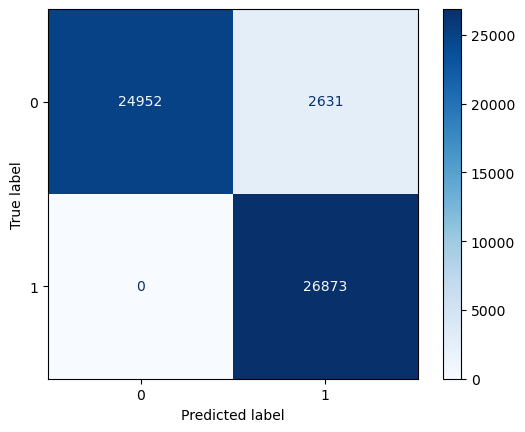

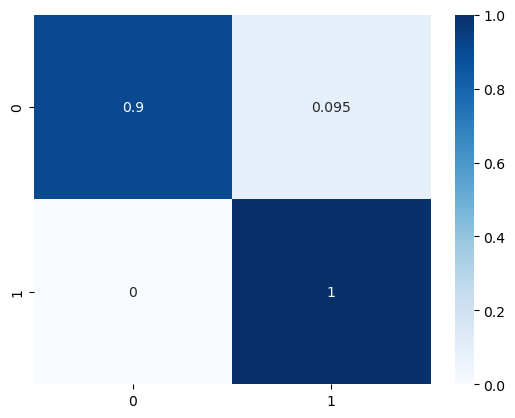

In [9]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.999614367562803
 The recall score is 0.9992562843968467
 The f1 score is 0.9996094113270715
 The roc score is 0.9996188518186776

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27583
           1       1.00      1.00      1.00     26873

    accuracy                           1.00     54456
   macro avg       1.00      1.00      1.00     54456
weighted avg       1.00      1.00      1.00     54456


Cross validation score: [0.99963267 0.99990817 0.99981634 0.99981634 0.9997245 ]

Mean cross validation score: 0.999779600877409



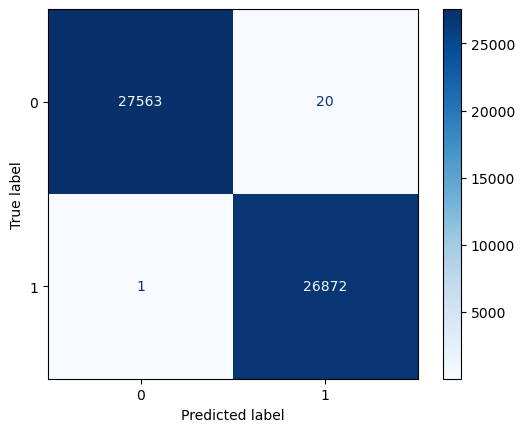

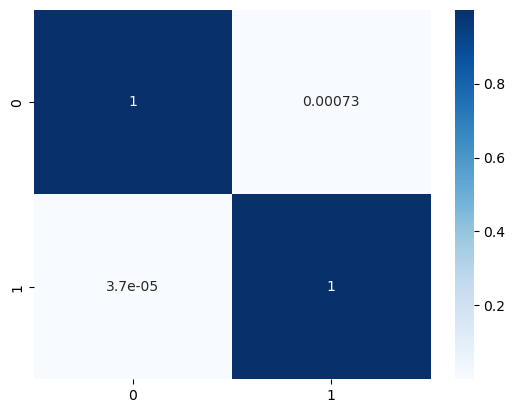

In [10]:
supportvm = dp.supportvm(X_train, X_test, y_train, y_test)
supportvm.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


The accuracy score is 0.989863375936536
 The recall score is 0.9806435119243271
 The f1 score is 0.989825634976223
 The roc score is 0.9899833003560466

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     27583
           1       0.98      1.00      0.99     26873

    accuracy                           0.99     54456
   macro avg       0.99      0.99      0.99     54456
weighted avg       0.99      0.99      0.99     54456




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights

Cross validation score: [1.         1.         0.99981634 1.         1.        ]

Mean cross validation score: 0.9999632670036094



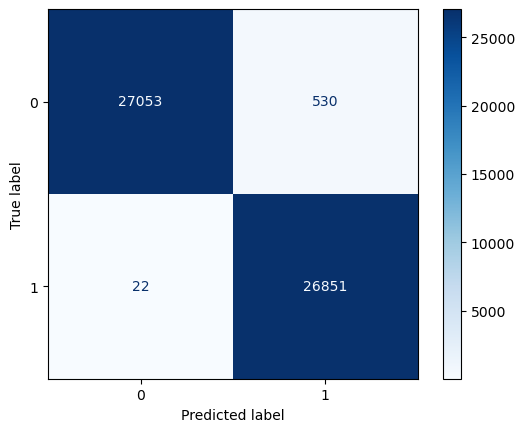

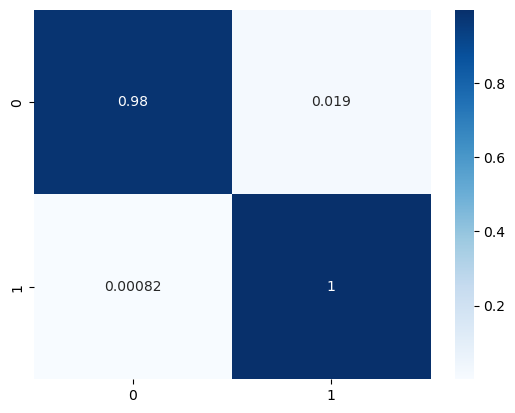

In [11]:
randomforest = dp.RandomForest(X_train, X_test, y_train, y_test)
randomforest.fit()

## RandomUnderSampler

In [8]:
scsplit = dp.scalesplit(df2)
X_train, X_test, y_train, y_test = scsplit.ssplit()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20076, 11), (5020, 11), (20076,), (5020,))

The accuracy score is 0.94601593625498
 The recall score is 0.9025530384753686
 The f1 score is 0.9487809487809488
 The roc score is 0.9460159362549801

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94      2510
           1       0.90      1.00      0.95      2510

    accuracy                           0.95      5020
   macro avg       0.95      0.95      0.95      5020
weighted avg       0.95      0.95      0.95      5020


Cross validation score: [0.78286853 0.80174345 0.77783311 0.77783311 0.80473224]

Mean cross validation score: 0.7890020883084502



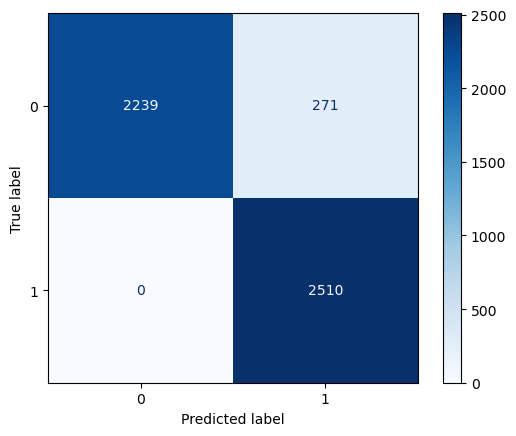

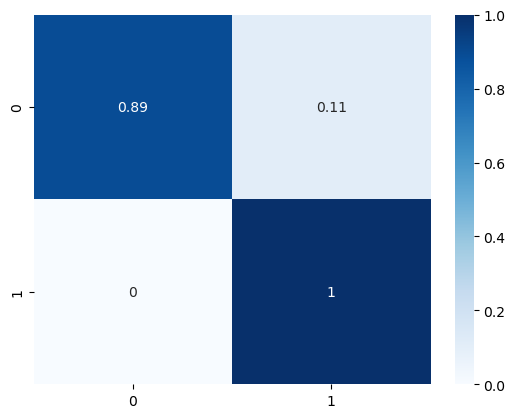

In [9]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.998207171314741
 The recall score is 0.9972166998011929
 The f1 score is 0.9982089552238806
 The roc score is 0.998207171314741

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2510
           1       1.00      1.00      1.00      2510

    accuracy                           1.00      5020
   macro avg       1.00      1.00      1.00      5020
weighted avg       1.00      1.00      1.00      5020


Cross validation score: [0.99701195 0.99800747 0.99202989 0.98505604 0.99302615]

Mean cross validation score: 0.9930263003789526



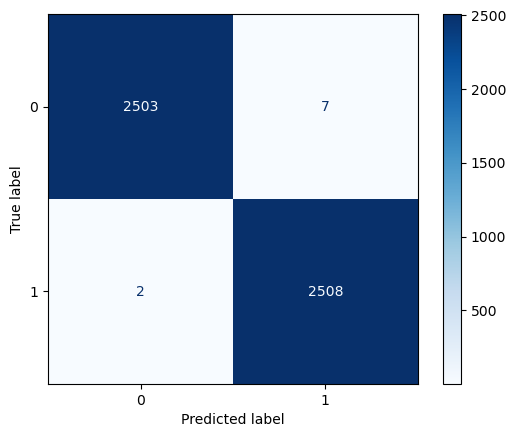

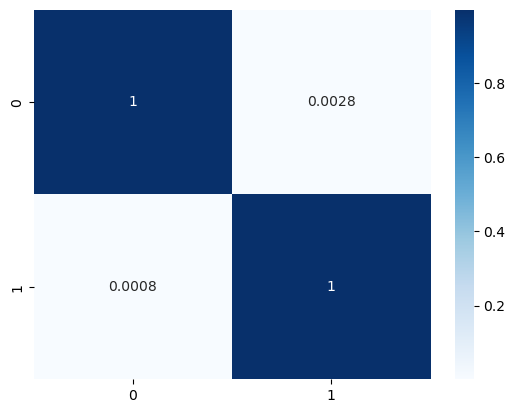

In [10]:
supportvm = dp.supportvm(X_train, X_test, y_train, y_test)
supportvm.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


The accuracy score is 0.9292828685258964
 The recall score is 1.0
 The f1 score is 0.9239013933547695
 The roc score is 0.9292828685258965

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      2510
           1       1.00      0.86      0.92      2510

    accuracy                           0.93      5020
   macro avg       0.94      0.93      0.93      5020
weighted avg       0.94      0.93      0.93      5020




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights

Cross validation score: [1. 1. 1. 1. 1.]

Mean cross validation score: 1.0



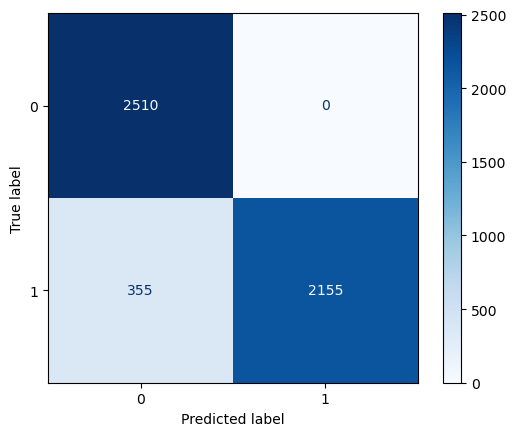

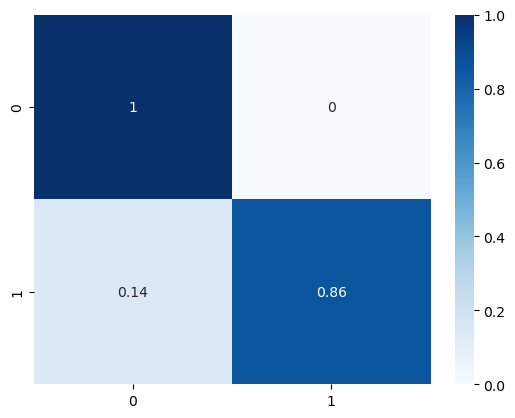

In [11]:
randomforest = dp.RandomForest(X_train, X_test, y_train, y_test)
randomforest.fit()

## Non-Balanced

In [20]:
scsplit = dp.scalesplit(df)
X_train, X_test, y_train, y_test = scsplit.ssplit()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120371, 11), (30093, 11), (120371,), (30093,))

The accuracy score is 0.6484896819858439
 The recall score is 0.19177872860635697
 The f1 score is 0.32183613283754325
 The roc score is 0.8082514592321357

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.62      0.76     27583
           1       0.19      1.00      0.32      2510

    accuracy                           0.65     30093
   macro avg       0.60      0.81      0.54     30093
weighted avg       0.93      0.65      0.73     30093


Cross validation score: [-3.63836129 -3.59047094 -3.64374106 -3.68021497 -3.57969956]

Mean cross validation score: -3.626497563760542



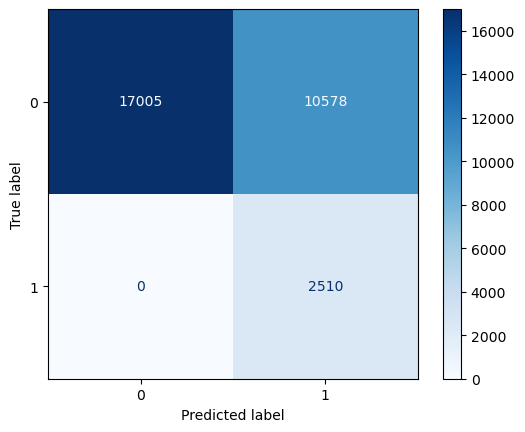

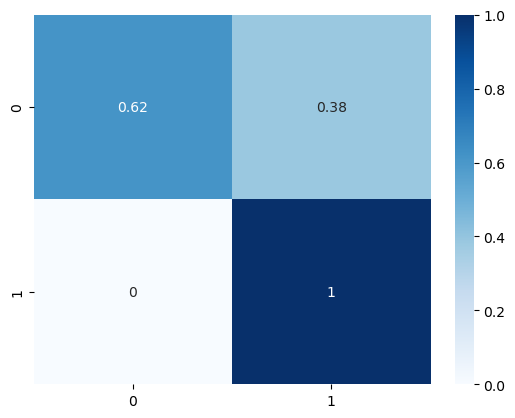

In [21]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9978732595620244
 The recall score is 0.9807389937106918
 The f1 score is 0.9873367629600317
 The roc score is 0.9961237239347003

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27583
           1       0.98      0.99      0.99      2510

    accuracy                           1.00     30093
   macro avg       0.99      1.00      0.99     30093
weighted avg       1.00      1.00      1.00     30093


Cross validation score: [0.9978267  0.99782571 0.99891285 0.99565339 0.99945667]

Mean cross validation score: 0.997935065425062



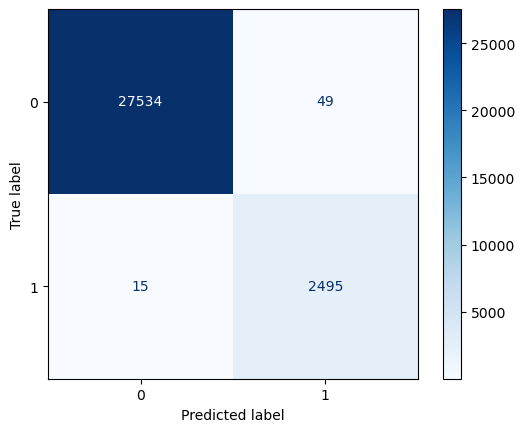

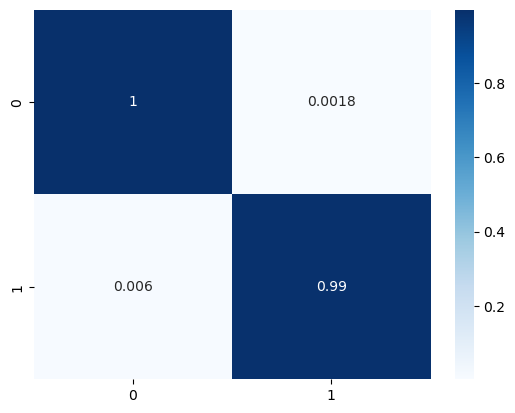

In [22]:
supportvm = dp.supportvm(X_train, X_test, y_train, y_test)
supportvm.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


The accuracy score is 0.9929551722992058
 The recall score is 0.9284116331096197
 The f1 score is 0.9591679506933745
 The roc score is 0.9925355316579456

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     27583
           1       0.93      0.99      0.96      2510

    accuracy                           0.99     30093
   macro avg       0.96      0.99      0.98     30093
weighted avg       0.99      0.99      0.99     30093




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights

Cross validation score: [0.99945668 1.         1.         1.         1.        ]

Mean cross validation score: 0.9998913350991737



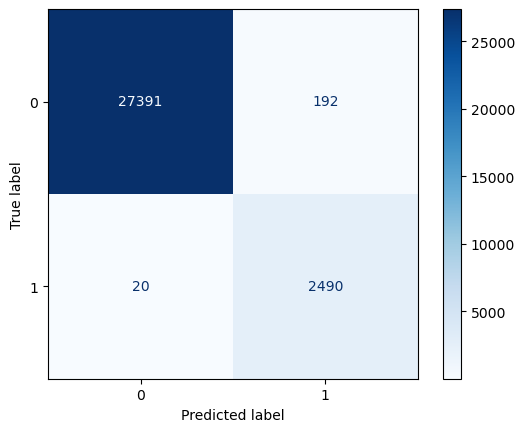

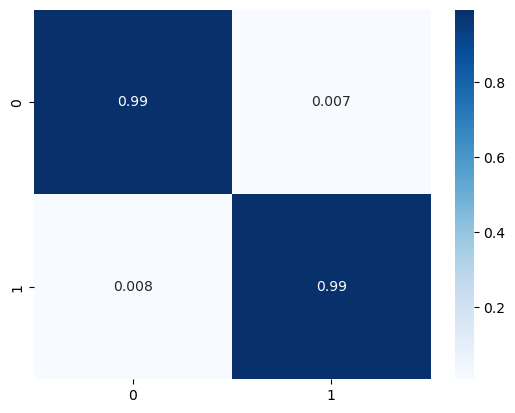

In [23]:
randomforest = dp.RandomForest(X_train, X_test, y_train, y_test)
randomforest.fit()